### Requirements
-----

In [1]:
import pandas as pd
pd.__version__

'1.5.3'

In [2]:
import numpy as np
np.__version__

'1.26.4'

In [3]:
import sklearn
sklearn.__version__

'1.5.0'

In [4]:
import scipy
scipy.__version__

'1.13.1'

-----

Extreme Learning Machines
-----

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.linalg import pinv

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42, stratify=mnist.target)

In [7]:
onehotencoder = OneHotEncoder(categories='auto')
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
y_train = onehotencoder.fit_transform(y_train.to_numpy().reshape(-1, 1)).toarray()

X_test = scaler.fit_transform(X_test)
y_test = onehotencoder.fit_transform(y_test.to_numpy().reshape(-1, 1)).toarray()

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56000, 784)
(56000, 10)
(14000, 784)
(14000, 10)


To initialize our network, we need to identify the following:
1. The size of the input layer, which is the number of input features
2. Number of hidden neurons
3. Input to hidden weights
4. Hidden layer activation function

The size of the input layer refers to the number of input features of the dataset.

In [9]:
def compute_network_accuracy(hidden_size=1000):

    input_size = X_train.shape[1]

    input_weights = np.random.normal(size=[input_size,hidden_size])
    biases = np.random.normal(size=[hidden_size])

    def relu(x):
        return np.maximum(x, 0, x)

    def hidden_nodes(X):
        G = np.dot(X, input_weights)
        G = G + biases
        H = relu(G)
        return H

    output_weights = np.dot(pinv(hidden_nodes(X_train)), y_train)
    def predict(X):
        out = hidden_nodes(X)
        out = np.dot(out, output_weights)
        return out

    prediction = predict(X_test)
    correct = 0
    total = X_test.shape[0]
    for i in range(total):
        predicted = np.argmax(prediction[i])
        actual = np.argmax(y_test[i])
        correct += 1 if predicted == actual else 0
    accuracy = correct/total
    print('Accuracy for', hidden_size, ' hidden nodes:', accuracy)

    return hidden_size, accuracy

In [10]:
from datetime import datetime
X=[]
y=[]
t=[]
for h in range(1,11):
    size = h*500
    start = datetime.now()
    tmp_X, tmp_y = compute_network_accuracy(size)
    X.append(tmp_X)
    y.append(tmp_y)
    tmp_t = (datetime.now()-start).seconds
    print(tmp_t, "s")
    t.append(tmp_t)

Accuracy for 500  hidden nodes: 0.9125
5 s
Accuracy for 1000  hidden nodes: 0.9402142857142857
15 s
Accuracy for 1500  hidden nodes: 0.9497142857142857
25 s
Accuracy for 2000  hidden nodes: 0.9557142857142857
49 s
Accuracy for 2500  hidden nodes: 0.9596428571428571
72 s
Accuracy for 3000  hidden nodes: 0.9630714285714286
115 s
Accuracy for 3500  hidden nodes: 0.9652857142857143
160 s
Accuracy for 4000  hidden nodes: 0.9659285714285715
223 s
Accuracy for 4500  hidden nodes: 0.9670714285714286
281 s
Accuracy for 5000  hidden nodes: 0.9705714285714285
355 s


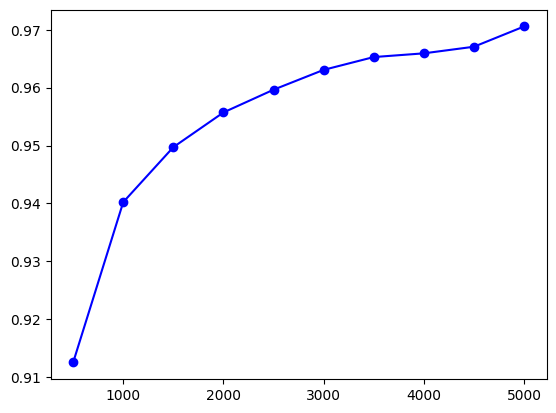

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, y, '-bo')

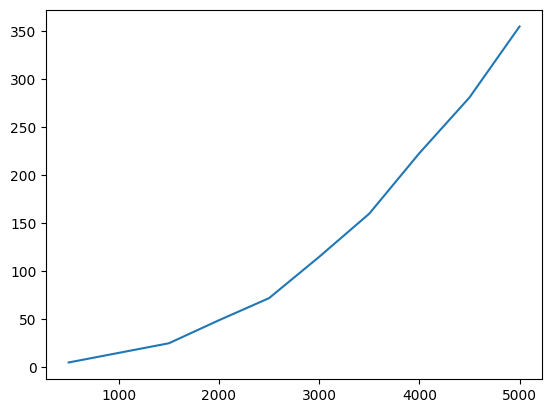

In [12]:
plt.plot(X, t)

-----
#### Standard Feedforward Neural Network:

1. multiply inputs by weights
2. add bias
3. apply the activation function
4. repeat steps 1–3 number of layers times
5. calculate output
6. backpropagate
7. repeat everything

#### Extreme Learning Machines

- remove *step 4*: ELM is always SLFN (Single hidden Layer Feedforward Neural network) 
- replace *step 6* and remove *step 7*: ELM doesn’t require gradient-based backpropagation to work. It uses Moore-Penrose generalized inverse - once - to set its weights.

$$f_L(x)=\sum_{i=1}^{L}\beta_i g_i(x)=\sum_{i=1}^{L}\beta_i g(w_i.x_j+b_i),j=1,\dots,N$$

Where:
- $L$ is a number of hidden units
- $N$ is a number of training samples
- $\beta$ is a weight vector between hidden layer and output
- $w$ is a weight vector between input and hidden layer
- $g$ is an activation function
- $b$ is a bias vector
- $x$ in an input vector

$$T=H\beta$$

Where:
$$
\begin{equation*}
H = 
\begin{bmatrix}
g(w_1.x_1+b_1) & \dots & g(w_L.x_1+b_L) \\
\vdots & \dots & \vdots \\
g(w_1.x_N+b_1) & \dots & g(w_L.x_N+b_L)
\end{bmatrix}_{N\times L}
\end{equation*}
$$

$$
\begin{equation*}
\beta = 
\begin{bmatrix}
\beta_1^T \\
\vdots \\
\beta_L^T \\
\end{bmatrix}_{L\times m}
T = 
\begin{bmatrix}
t_1^T \\
\vdots \\
t_N^T \\
\end{bmatrix}_{N\times m}
\end{equation*}
$$

Where:
- $m$ is a number of outputs
- $H$ is called **Hidden Layer Output Matrix**
- $T$ is a training data target matrix

**Algorithm**
1. Randomly assign weight $w_i$ and bias $b_i,i=1,\dots,L$
2. Calculate hidden layer output $H$
3. Calculate output weight matrix $\hat{\beta} = H^\top T$
4. Use $\hat{\beta}$ to make a prediction on new data $T=H\hat{\beta}$
------